In [1]:
# 02/04/2020

# Student Name : Fernando Cavina
# Cohort       : Divisadero


#############################################################################

""" OBJECTIVES:

this assignment aims to make predictions about consumers who have used the product "Halfway There", 
in which subscribed customers receive half a bottle of wine weekly.

We will analyze the dataset, and develop a machine learning model, 
in order to predict which customers will subscribe to the service. 
"""

""" Fact to consider:
- The range of the price is from $10 to $23 per meal;
- The range of the price is from $ 7 to $25 for wine, $1 to $3 for still water and $1 to $5 for sparkling water;
- There are different email response rates based on a customer’s email domain group

"""

' Fact to consider:\n- The range of the price is from $10 to $23 per meal;\n- The range of the price is from $ 7 to $25 for wine, $1 to $3 for still water and $1 to $5 for sparkling water;\n- There are different email response rates based on a customer’s email domain group\n\n'

In [2]:
# Import Packages
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns          
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model

# <i> Analysis </i>

##  <i> Exploratory Analysis </i>

In [3]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset (1).xlsx'

# reading the file into Python
apprentice = pd.read_excel(file)

In [4]:
apprentice

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0


## <i> Feature Treatment & Engineering </i>

In [5]:
# Calculating average price per meal and try to spot if a customer has order beverages. 
# logic is that if the avd meal price of the customer exceeds the overall average price per meal, 
# then the customer has order beverages 
# Techniclly the avg price per meal can not exceed 23 since this is the maximum price therefore it means that 
# they are ordering some add-on. With those that have a lower price per meal, i cna be assume that they need to reach at leat 17 
# avg per meal to achive the treshold or order the most expensive wine, only then they can be pass the threshold 

chef_data = apprentice.copy()

# (1) creating a column for avg price meal

chef_data['AVG_PRICE_MEAL'] = chef_data['REVENUE']/chef_data['TOTAL_MEALS_ORDERED'].round(2)

# chef_data['AVG_PRICE_MEAL'].quantile([0.10,
                                      #0.25,
                                      #0.50,
                                      #0.75,
                                      #0.90])
chef_data = pd.DataFrame(chef_data)

#chef_data.isnull().sum()

In [6]:
#chef_data['ORDERED_BEVERAGES'] = np.where(chef_data['AVG_PRICE_MEAL'] > 23, 1, 0)

In [7]:
# (2)creating ordered beverage column
chef_data['ORDERED_BEVERAGES'] = 0

# looping to find Miss.
for index, val in chef_data.iterrows():
    
    if chef_data.loc[index, 'AVG_PRICE_MEAL'] > 23:
        chef_data.loc[index, 'ORDERED_BEVERAGES'] = 1
        
    elif chef_data.loc[index,'AVG_PRICE_MEAL'] <= 23:
        chef_data.loc[index, 'ORDERED_BEVERAGES'] = 0
    
    else:
        print('error')
        
chef_data.to_excel('Apprentice_Chef_featured.xlsx',
                 index = False)

In [8]:
chef_data.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,AVG_PRICE_MEAL,ORDERED_BEVERAGES
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,15.932203,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,33.977273,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,67.697368,1
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,21.671053,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,29.584615,1


In [9]:
# (4) Creating a column for % of unique meals purchased
chef_data['PER_UNIQUE_MEALS']= round(chef_data['UNIQUE_MEALS_PURCH']/ chef_data['TOTAL_MEALS_ORDERED']*100, 2)

In [10]:
# (5) Based on the previous column creating a "williness to try new things"

chef_data['WILLIGNESS_NEW_PRODUCTS'] = 0
chef_data['WILLIGNESS_NEW_PRODUCTS'][chef_data['PER_UNIQUE_MEALS'] >= 20]= 1


chef_data['WILLIGNESS_NEW_PRODUCTS'].sum()


chef_data.to_excel('Apprentice_Chef_featured.xlsx',
                 index = False)


C:\Users\ferna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Classifying emails

In [11]:


# Splitting personal emails (creating 5 new features)

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef_data.iterrows():
    
    # splitting email domain at '@'
    class_email = chef_data.loc[index,'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(class_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [12]:
#concatenating with original DataFrame
# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']


chef_data = pd.concat([chef_data, email_df['EMAIL_DOMAIN']],
                     axis = 1)


In [13]:
# 3 email domain class
PERSONAL_EMAIL= ['@gmail.com', '@yahoo.com', '@protonmail.com']
JUNK_EMAIL = ['@me.com', '@aol.com', '@hotmail.com', '@ive.com', '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef_data['EMAIL_DOMAIN']:
    
    if '@' + domain in PERSONAL_EMAIL:
        placeholder_lst.append('PERSONAL_@')
        

    elif '@' + domain in JUNK_EMAIL:
        placeholder_lst.append('JUNK_@')


    else:
        placeholder_lst.append('PROFESSIONAL_@')


# concatenating with original_2
chef_data['DOMAIN_CLASS'] = pd.Series(placeholder_lst)


# checking results
chef_data['DOMAIN_CLASS'].value_counts()



PERSONAL_@        861
PROFESSIONAL_@    758
JUNK_@            327
Name: DOMAIN_CLASS, dtype: int64

In [14]:
# Creating variable 1/0 for emails
EMAIL_CLASS = pd.get_dummies(chef_data['DOMAIN_CLASS'])

# Droping columns i wont be using

#chef_data = .drop('EMAIL_DOMAIN', axis = 1)
#chef_data = original_2.drop('DOMAIN_CLASS', axis = 1)

# joining codings together
chef_data= chef_data.join([EMAIL_CLASS])


# saving new columns
email_dummies_columns = chef_data.columns

chef_data

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,AVG_PRICE_MEAL,ORDERED_BEVERAGES,PER_UNIQUE_MEALS,WILLIGNESS_NEW_PRODUCTS,EMAIL_DOMAIN,DOMAIN_CLASS,JUNK_@,PERSONAL_@,PROFESSIONAL_@
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,15.932203,0,3.39,0,passport.com,JUNK_@,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,33.977273,1,6.82,0,jnj.com,PROFESSIONAL_@,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,67.697368,1,2.63,0,gmail.com,PERSONAL_@,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,21.671053,0,3.95,0,ibm.com,PROFESSIONAL_@,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,29.584615,1,4.62,0,goldmansacs.com,PROFESSIONAL_@,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98,39.868421,1,23.68,1,yahoo.com,PERSONAL_@,0,1,0
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0,30.468085,1,17.02,0,gmail.com,PERSONAL_@,0,1,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0,44.500000,1,42.86,1,gmail.com,PERSONAL_@,0,1,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0,59.933333,1,26.67,1,protonmail.com,PERSONAL_@,0,1,0


In [15]:
counts = chef_data['EMAIL_DOMAIN'].value_counts()
counts

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
mcdonalds.com        28
jnj.com              28
cocacola.com         28
apple.com            27
nike.com             27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
caterpillar.com      22
verizon.com          22
pg.com               22
mmm.com              22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
homedepot.com        17
intel.com            17
Name: EMAIL_DOMAIN, dtype: int64

In [16]:
chef_data['OVER_21'] = 1
chef_data['OVER_21'][chef_data['EMAIL_DOMAIN'] == 'gmail.com'] = 0

C:\Users\ferna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
chef_data = chef_data.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'],axis=1)

## Outlier Analysis

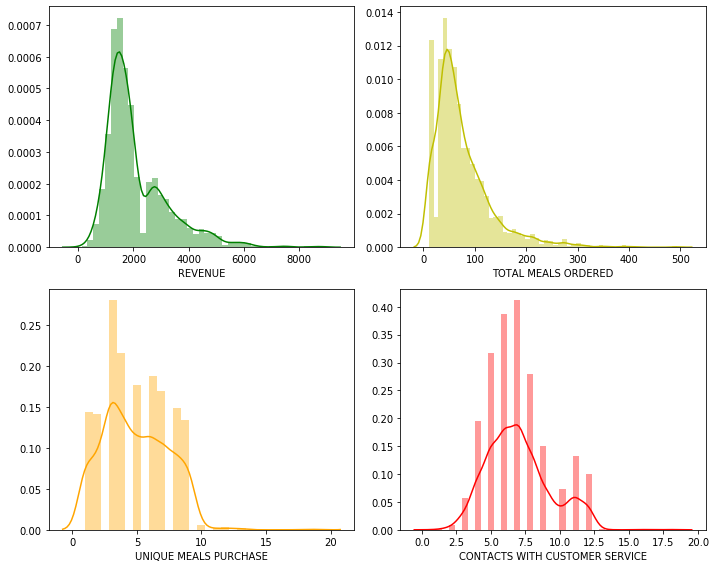

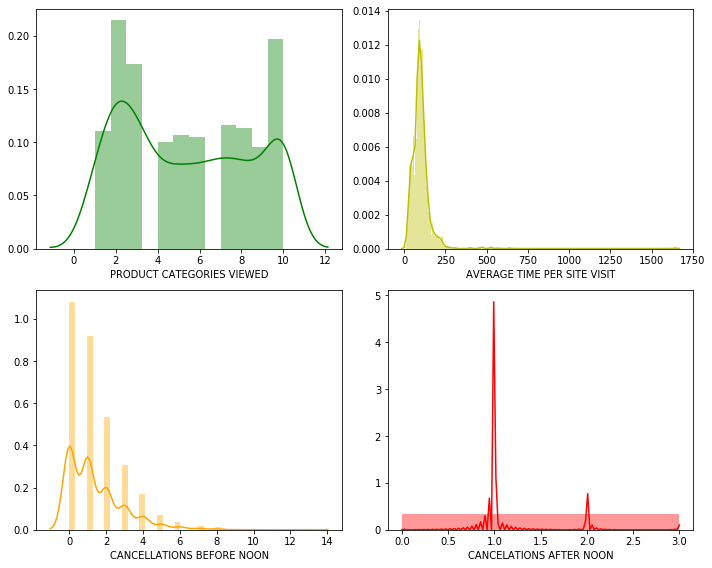

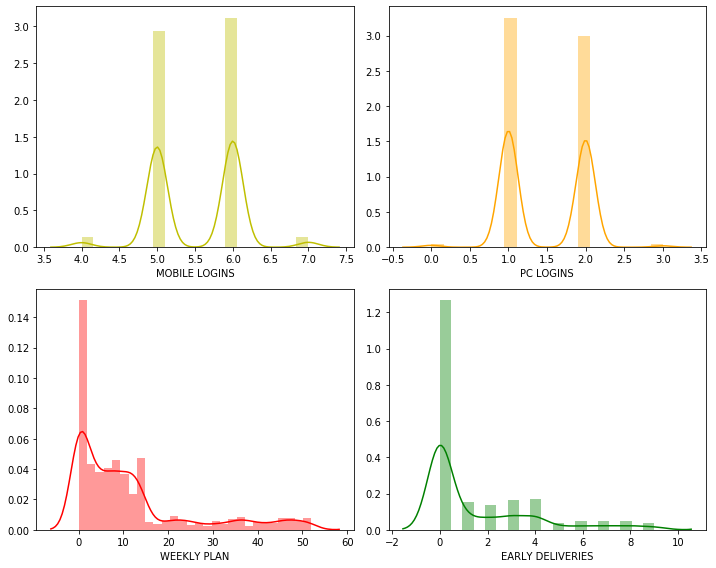

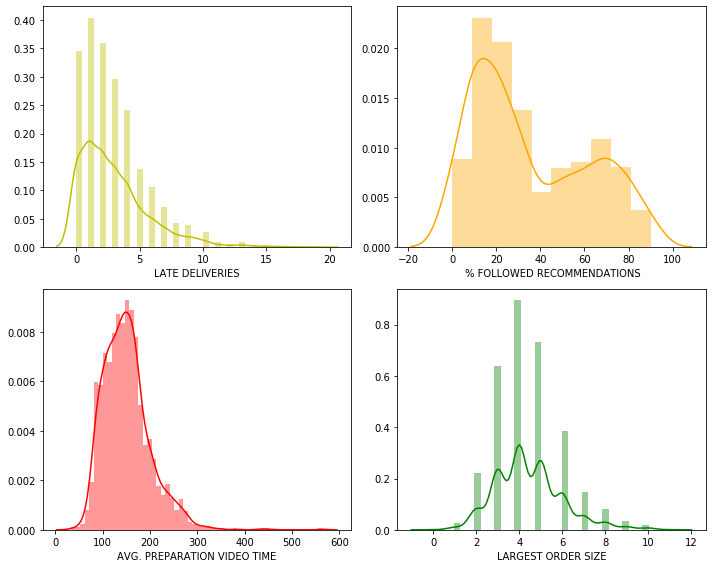

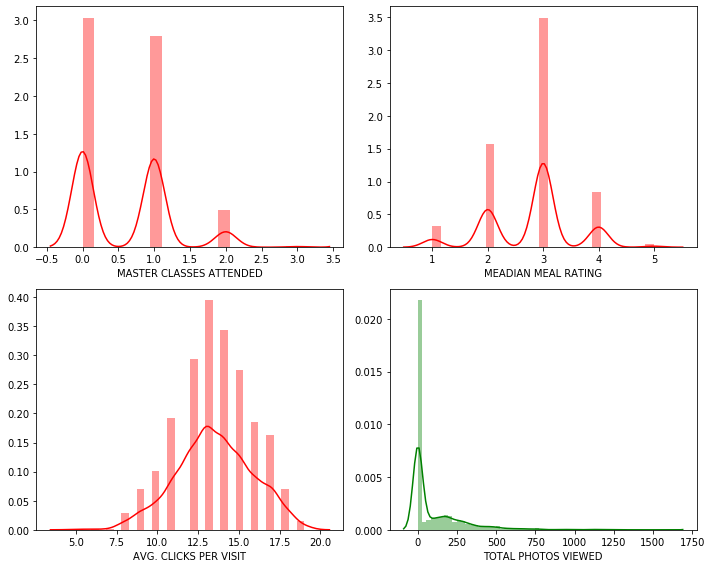

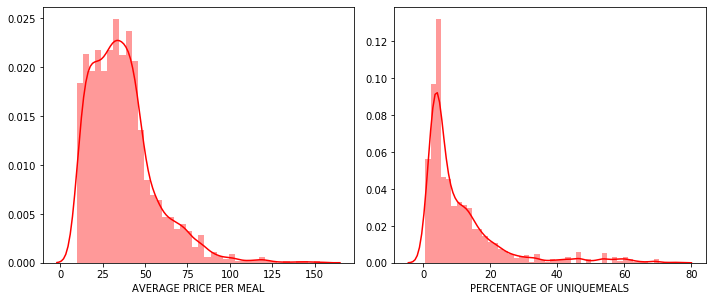

In [18]:
# Calling excel file

chef_data.to_excel('Apprentice_Chef_featured.xlsx',
                 index = False)


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL MEALS ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('UNIQUE MEALS PURCHASE')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef_data['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('CONTACTS WITH CUSTOMER SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVERAGE TIME PER SITE VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('CANCELLATIONS BEFORE NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef_data['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('CANCELATIONS AFTER NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE LOGINS')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['PC_LOGINS'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('PC LOGINS')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('WEEKLY PLAN')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef_data['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('EARLY DELIVERIES')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('LATE DELIVERIES')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins = 10,
             color = 'orange')
plt.xlabel(' % FOLLOWED RECOMMENDATIONS')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['AVG_PREP_VID_TIME'],
             bins = 'fd',
             color = 'r')
plt.xlabel('AVG. PREPARATION VIDEO TIME')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef_data['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST ORDER SIZE')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MASTER CLASSES ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MEADIAN MEAL RATING')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['AVG_CLICKS_PER_VISIT'],
             bins = 'fd',
             color = 'r')
plt.xlabel('AVG. CLICKS PER VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef_data['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL PHOTOS VIEWED')


plt.tight_layout()
plt.show()


##############################
#############################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['AVG_PRICE_MEAL'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('AVERAGE PRICE PER MEAL')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['PER_UNIQUE_MEALS'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PERCENTAGE OF UNIQUEMEALS')

plt.tight_layout()
plt.show()
########################



In [19]:
REVENUE_hi = 5000 

TOTAL_MEALS_ORDERED_hi = 220   

UNIQUE_MEALS_PURCH_hi = 9   

CONTACTS_W_CUSTOMER_SERVICE_hi = 12
CONTACTS_W_CUSTOMER_SERVICE_lo = 2.5

AVG_TIME_PER_SITE_VISIT_hi = 200    

CANCELLATIONS_BEFORE_NOON_hi = 6

MOBILE_LOGINS_hi = 6
MOBILE_LOGINS_lo = 5

PC_LOGINS_hi = 2
PC_LOGINS_lo = 1

EARLY_DELIVERIES_hi = 4

LATE_DELIVERIES_hi = 10  

AVG_PREP_VID_TIME_hi = 300

LARGEST_ORDER_SIZE_hi = 8   
LARGEST_ORDER_SIZE_lo = 2

MASTER_CLASSES_ATTENDED_hi = 1
MASTER_CLASSES_ATTENDED_lo = 0

MEDIAN_MEAL_RATING_hi = 4

AVG_CLICKS_PER_VISIT_hi = 17.5
AVG_CLICKS_PER_VISIT_lo = 10

TOTAL_PHOTOS_VIEWED_hi = 350
AVG_EXPENSE_PER_MEAL_hi = 75

PER_UNIQUE_MEAL_hi = 25

In [20]:
# renaming my data frame to reuse old code

apprentice_2 = chef_data.copy()

#cheking
apprentice_2['MOBILE_LOGINS']

0       6
1       6
2       6
3       6
4       6
       ..
1941    6
1942    5
1943    6
1944    6
1945    7
Name: MOBILE_LOGINS, Length: 1946, dtype: int64

In [21]:
apprentice_2

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,AVG_PRICE_MEAL,ORDERED_BEVERAGES,PER_UNIQUE_MEALS,WILLIGNESS_NEW_PRODUCTS,EMAIL_DOMAIN,DOMAIN_CLASS,JUNK_@,PERSONAL_@,PROFESSIONAL_@,OVER_21
0,1880.0,1,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,15.932203,0,3.39,0,passport.com,JUNK_@,1,0,0,1
1,1495.0,1,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,33.977273,1,6.82,0,jnj.com,PROFESSIONAL_@,0,0,1,1
2,2572.5,1,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,67.697368,1,2.63,0,gmail.com,PERSONAL_@,0,1,0,0
3,1647.0,1,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,21.671053,0,3.95,0,ibm.com,PROFESSIONAL_@,0,0,1,1
4,1923.0,1,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,29.584615,1,4.62,0,goldmansacs.com,PROFESSIONAL_@,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98,39.868421,1,23.68,1,yahoo.com,PERSONAL_@,0,1,0,1
1942,1432.0,0,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0,30.468085,1,17.02,0,gmail.com,PERSONAL_@,0,1,0,0
1943,623.0,0,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0,44.500000,1,42.86,1,gmail.com,PERSONAL_@,0,1,0,0
1944,899.0,0,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0,59.933333,1,26.67,1,protonmail.com,PERSONAL_@,0,1,0,1


In [22]:
# developing features (columns) for outliers

# REVENUE ----> RESPONSE VARIABLE
apprentice_2['OUT_REVENUE'] = 0
condition_hi_re = apprentice_2.loc[0:,'OUT_REVENUE'][apprentice_2['REVENUE'] > REVENUE_hi]

apprentice_2['OUT_REVENUE'].replace(to_replace = condition_hi_re,
                                value      = 1,
                                inplace    = True)

#Explanatory variables 

#TOTAL_MEALS_ORDERED
apprentice_2['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi_meals = apprentice_2.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][apprentice_2['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

apprentice_2['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi_meals,
                                value      = 1,
                                inplace    = True)


#UNIQUE_MEALS_PURCH_
apprentice_2['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi_unq = apprentice_2.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][apprentice_2['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

apprentice_2['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi_unq,
                                value      = 1,
                                inplace    = True)

#CONTACTS_W_CUSTOMER_SERVICE high
apprentice_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi_cs = apprentice_2.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_2['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

apprentice_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi_cs,
                                value      = 1,
                                inplace    = True)

# CONTACT_W_CUSTOMER_SERVICE low
apprentice_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_lo_cs = apprentice_2.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]



apprentice_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo_cs,
                                 value      = 1,
                                 inplace    = True)

#AVG_TIME_PER_SITE_VISIT
apprentice_2['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi_sv = apprentice_2.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][apprentice_2['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

apprentice_2['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi_sv,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_BEFORE_NOON
apprentice_2['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi_bnoon = apprentice_2.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][apprentice_2['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

apprentice_2['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi_bnoon,
                                value      = 1,
                                inplace    = True)

#AVG_CLICKS_PER_VISIT low/high
apprentice_2['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi_cl = apprentice_2.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][apprentice_2['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo_cl = apprentice_2.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][apprentice_2['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

apprentice_2['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi_cl,
                                 value      = 1,
                                 inplace    = True)

apprentice_2['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo_cl,
                                 value      = 1,
                                 inplace    = True)


# MOBILE_LOGINGS high/low
apprentice_2['MOBILE_LOGINS_hi'] = 0
condition_hi_mlg = apprentice_2.loc[0:,'MOBILE_LOGINS_hi'][apprentice_2['MOBILE_LOGINS_hi'] > MOBILE_LOGINS_hi]
condition_lo_mlg = apprentice_2.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][apprentice_2['AVG_CLICKS_PER_VISIT'] < MOBILE_LOGINS_lo]

apprentice_2['MOBILE_LOGINS'].replace(to_replace = condition_hi_mlg,
                                 value      = 1,
                                 inplace    = True)

apprentice_2['MOBILE_LOGINS'].replace(to_replace = condition_lo_mlg,
                                 value      = 1,
                                 inplace    = True)


# PC_lOGINS
apprentice['MOBILE_LOGINS_hi'] = 0
condition_hi_mlg = apprentice_2.loc[0:,'MOBILE_LOGINS_hi'][apprentice_2['MOBILE_LOGINS_hi'] > MOBILE_LOGINS_hi]
condition_lo_mlg = apprentice_2.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][apprentice_2['AVG_CLICKS_PER_VISIT'] < MOBILE_LOGINS_lo]

apprentice_2['MOBILE_LOGINS'].replace(to_replace = condition_hi_mlg,
                                 value      = 1,
                                 inplace    = True)

apprentice_2['MOBILE_LOGINS'].replace(to_replace = condition_lo_mlg,
                                 value      = 1,
                                 inplace    = True)


#EARLY_DELIVERIES
apprentice_2['OUT_EARLY_DELIVERIES'] = 0
condition_hi_ed = apprentice_2.loc[0:,'OUT_EARLY_DELIVERIES'][apprentice_2['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

apprentice_2['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi_ed,
                                value      = 1,
                                inplace    = True)

#LATE_DELIVERIES
apprentice_2['OUT_LATE_DELIVERIES'] = 0
condition_hi_ld = apprentice_2.loc[0:,'OUT_LATE_DELIVERIES'][apprentice_2['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

apprentice_2['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi_ld,
                                value      = 1,
                                inplace    = True)


#AVG_PREP_VID_TIME
apprentice_2['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi_vid= apprentice_2.loc[0:,'OUT_AVG_PREP_VID_TIME'][apprentice_2['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

apprentice_2['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi_vid,
                                value      = 1,
                                inplace    = True)


#LARGEST_ORDER_SIZE
apprentice_2['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi_large= apprentice_2.loc[0:,'OUT_LARGEST_ORDER_SIZE'][apprentice_2['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

apprentice_2['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi_large,
                                value      = 1,
                                inplace    = True)




#TOTAL_PHOTOS_VIEWED
apprentice_2['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi_ph= apprentice_2.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][apprentice_2['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

apprentice_2['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi_ph,
                                value      = 1,
                                inplace    = True)


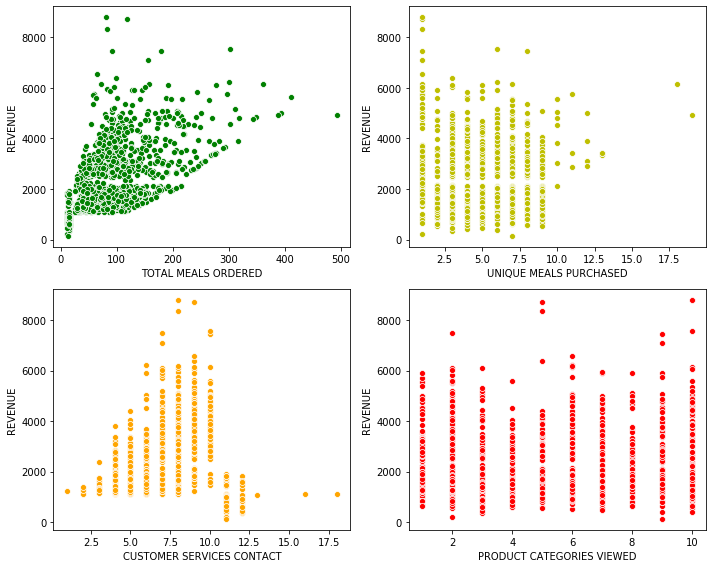

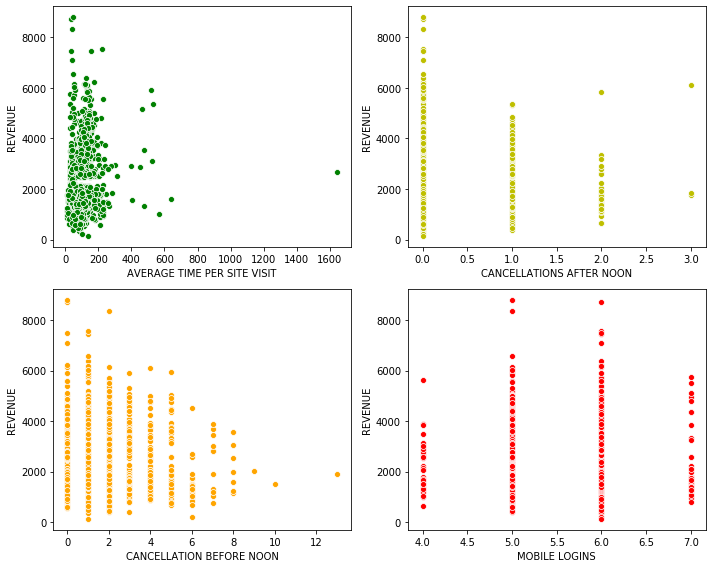

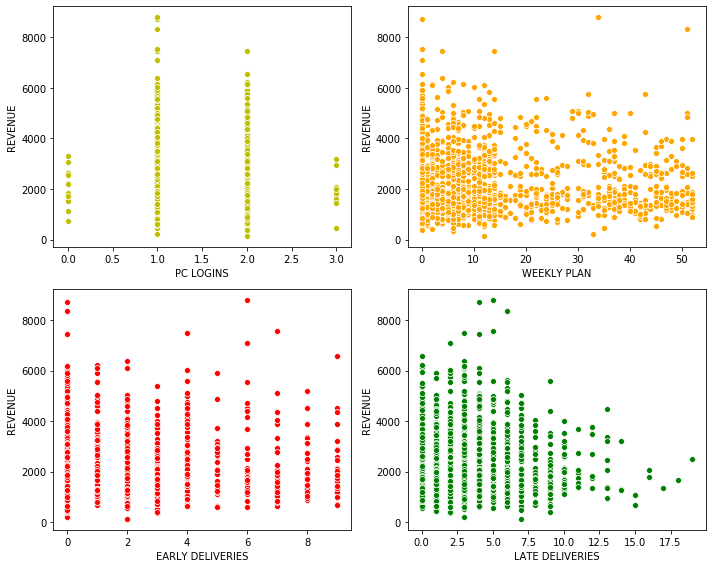

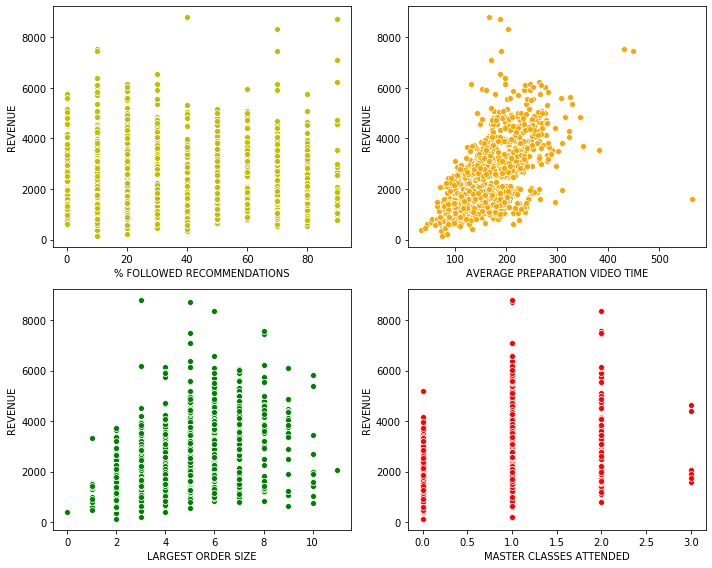

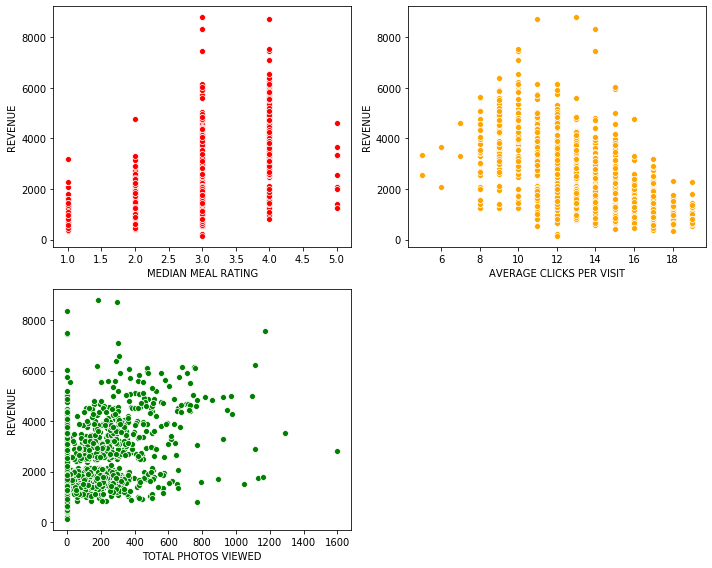

In [23]:
# Visual EDA (Scatterplots)
########################

apprentice_2 = apprentice.copy()

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'g')
plt.xlabel("TOTAL MEALS ORDERED")

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['UNIQUE_MEALS_PURCH'],
                y = apprentice['REVENUE'],
                color = 'y')
plt.xlabel('UNIQUE MEALS PURCHASED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
                y = apprentice['REVENUE'],
                color = 'orange')
plt.xlabel('CUSTOMER SERVICES CONTACT')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['PRODUCT_CATEGORIES_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice['REVENUE'],
                color = 'g')
plt.xlabel('AVERAGE TIME PER SITE VISIT')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['CANCELLATIONS_AFTER_NOON'],
                y = apprentice['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS AFTER NOON')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['CANCELLATIONS_BEFORE_NOON'],
                y = apprentice['REVENUE'],
                color = 'orange')
plt.xlabel('CANCELLATION BEFORE NOON')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['MOBILE_LOGINS'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('MOBILE LOGINS')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['PC_LOGINS'],
                y = apprentice['REVENUE'],
                color = 'y')
plt.xlabel('PC LOGINS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['WEEKLY_PLAN'],
                y = apprentice['REVENUE'],
                color = 'orange')
plt.xlabel('WEEKLY PLAN')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['EARLY_DELIVERIES'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('EARLY DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['LATE_DELIVERIES'],
                y = apprentice['REVENUE'],
                color = 'g')
plt.xlabel('LATE DELIVERIES')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = apprentice['REVENUE'],
                color = 'y')
plt.xlabel('% FOLLOWED RECOMMENDATIONS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x= apprentice['AVG_PREP_VID_TIME'],
                y = apprentice['REVENUE'],
                color = 'orange')
plt.xlabel('AVERAGE PREPARATION VIDEO TIME')

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['LARGEST_ORDER_SIZE'],
                y = apprentice['REVENUE'],
                color = 'g')
plt.xlabel('LARGEST ORDER SIZE')

plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['MASTER_CLASSES_ATTENDED'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('MASTER CLASSES ATTENDED')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['MEDIAN_MEAL_RATING'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('MEDIAN MEAL RATING')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x= apprentice['AVG_CLICKS_PER_VISIT'],
                y = apprentice['REVENUE'],
                color = 'orange')
plt.xlabel('AVERAGE CLICKS PER VISIT')

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL PHOTOS VIEWED')

plt.tight_layout()
plt.show()

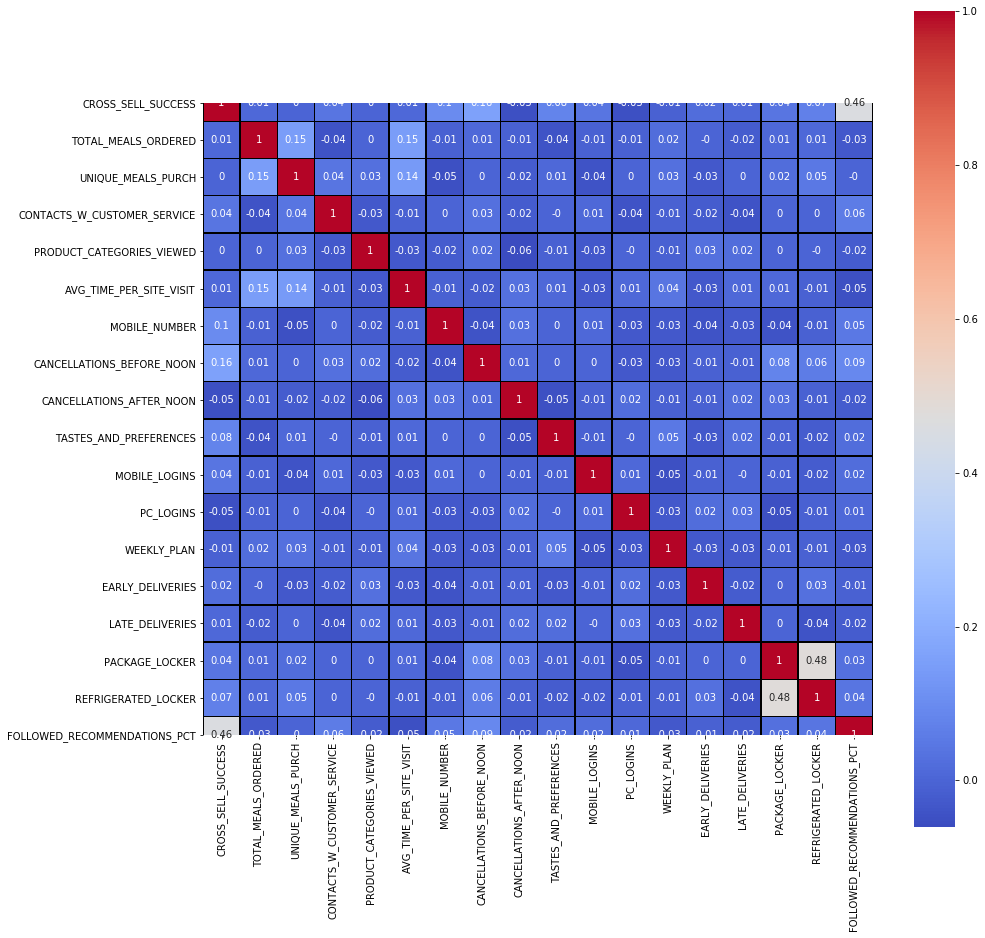

In [24]:
# correlation heatmap

fig, ax = plt.subplots(figsize=(15,15))

df_corr = chef_data.corr().round(2)

df_corr2 = df_corr.iloc[1:19, 1:19]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


plt.savefig('Apprentice Correlation Heatmap.png')
plt.show()

## <i> Logistic Regression </i>

In [25]:
# creating a (Pearson) correlation matrix
df_corr = chef_data.corr().round(2)


# printing (Pearson) correlations with Cross Sell Success
print(df_corr.loc[:,'CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS              1.00
FOLLOWED_RECOMMENDATIONS_PCT    0.46
CANCELLATIONS_BEFORE_NOON       0.16
PROFESSIONAL_@                  0.16
MOBILE_NUMBER                   0.10
TASTES_AND_PREFERENCES          0.08
REFRIGERATED_LOCKER             0.07
MOBILE_LOGINS                   0.04
PACKAGE_LOCKER                  0.04
CONTACTS_W_CUSTOMER_SERVICE     0.04
PERSONAL_@                      0.04
MASTER_CLASSES_ATTENDED         0.04
MEDIAN_MEAL_RATING              0.03
AVG_PREP_VID_TIME               0.03
LARGEST_ORDER_SIZE              0.02
EARLY_DELIVERIES                0.02
TOTAL_PHOTOS_VIEWED             0.01
ORDERED_BEVERAGES               0.01
LATE_DELIVERIES                 0.01
AVG_TIME_PER_SITE_VISIT         0.01
TOTAL_MEALS_ORDERED             0.01
PRODUCT_CATEGORIES_VIEWED       0.00
UNIQUE_MEALS_PURCH              0.00
REVENUE                         0.00
WEEKLY_PLAN                    -0.01
AVG_PRICE_MEAL                 -0.02
OVER_21                        -0.02
P

In [26]:
chef_x = chef_data.drop('CROSS_SELL_SUCCESS', axis = 1)

chef_y = chef_data.loc[ :, 'CROSS_SELL_SUCCESS']

In [27]:
chef_y

0       1
1       1
2       1
3       1
4       1
       ..
1941    0
1942    0
1943    0
1944    0
1945    0
Name: CROSS_SELL_SUCCESS, Length: 1946, dtype: int64

In [28]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_x,
            chef_y,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_y)


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

In [29]:
#chef_train.info()
chef_train


,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,AVG_PRICE_MEAL,ORDERED_BEVERAGES,PER_UNIQUE_MEALS,WILLIGNESS_NEW_PRODUCTS,EMAIL_DOMAIN,DOMAIN_CLASS,JUNK_@,PERSONAL_@,PROFESSIONAL_@,OVER_21,CROSS_SELL_SUCCESS
982,2050.0,188,4,9,5,71.45,1,4,0,1,6,2,1,1,3,1,0,20,248.0,11,2,3,12,0,10.904255,0,2.13,0,merck.com,PROFESSIONAL_@,0,0,1,1,1
483,1600.0,52,9,6,4,60.00,1,0,0,1,6,1,13,0,4,0,0,50,126.8,5,2,2,16,88,30.769231,1,17.31,0,yahoo.com,PERSONAL_@,0,1,0,1,1
1908,1500.0,126,5,6,4,64.20,0,5,0,1,6,1,12,4,4,1,0,20,158.2,4,1,2,14,0,11.904762,0,3.97,0,aol.com,JUNK_@,1,0,0,1,0
1022,1190.0,34,7,3,3,143.87,1,6,0,1,5,2,8,8,0,0,0,10,98.8,3,0,2,17,0,35.000000,1,20.59,1,protonmail.com,PERSONAL_@,0,1,0,1,1
96,2835.0,50,8,6,5,129.22,1,7,0,1,5,2,26,1,3,1,1,80,214.9,4,1,3,14,0,56.700000,1,16.00,0,gmail.com,PERSONAL_@,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1725.0,124,3,7,2,170.00,1,3,0,1,7,1,45,4,0,0,0,70,132.0,3,1,3,15,509,13.911290,0,2.42,0,gmail.com,PERSONAL_@,0,1,0,0,1
1766,999.0,13,9,12,4,60.70,1,0,0,1,6,2,2,0,1,0,0,10,79.2,2,0,2,14,0,76.846154,1,69.23,1,hotmail.com,JUNK_@,1,0,0,1,0
727,349.0,15,3,12,3,85.79,1,1,0,1,6,2,6,3,2,0,0,40,72.0,2,0,1,18,0,23.266667,1,20.00,1,protonmail.com,PERSONAL_@,0,1,0,1,1
723,3750.0,62,8,8,9,242.30,1,5,1,1,5,2,11,4,2,0,0,30,203.2,5,0,4,10,668,60.483871,1,12.90,0,unitedtech.com,PROFESSIONAL_@,0,0,1,1,1


In [29]:
for val in chef_x:
    print(f"chef_train['{val}'] +")

chef_train['REVENUE'] +
chef_train['NAME'] +
chef_train['EMAIL'] +
chef_train['FIRST_NAME'] +
chef_train['FAMILY_NAME'] +
chef_train['TOTAL_MEALS_ORDERED'] +
chef_train['UNIQUE_MEALS_PURCH'] +
chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
chef_train['PRODUCT_CATEGORIES_VIEWED'] +
chef_train['AVG_TIME_PER_SITE_VISIT'] +
chef_train['MOBILE_NUMBER'] +
chef_train['CANCELLATIONS_BEFORE_NOON'] +
chef_train['CANCELLATIONS_AFTER_NOON'] +
chef_train['TASTES_AND_PREFERENCES'] +
chef_train['MOBILE_LOGINS'] +
chef_train['PC_LOGINS'] +
chef_train['WEEKLY_PLAN'] +
chef_train['EARLY_DELIVERIES'] +
chef_train['LATE_DELIVERIES'] +
chef_train['PACKAGE_LOCKER'] +
chef_train['REFRIGERATED_LOCKER'] +
chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef_train['AVG_PREP_VID_TIME'] +
chef_train['LARGEST_ORDER_SIZE'] +
chef_train['MASTER_CLASSES_ATTENDED'] +
chef_train['MEDIAN_MEAL_RATING'] +
chef_train['AVG_CLICKS_PER_VISIT'] +
chef_train['TOTAL_PHOTOS_VIEWED'] +
chef_train['AVG_PRICE_MEAL'] +
chef_train['ORDERED_

In [30]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ chef_train['CROSS_SELL_SUCCESS'] ~
                                        chef_train['REVENUE'] +
                                        chef_train['TOTAL_MEALS_ORDERED'] +
                                        chef_train['UNIQUE_MEALS_PURCH'] +
                                        chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                        chef_train['PRODUCT_CATEGORIES_VIEWED'] +
                                        chef_train['AVG_TIME_PER_SITE_VISIT'] +
                                        chef_train['MOBILE_NUMBER'] +
                                        chef_train['CANCELLATIONS_BEFORE_NOON'] +
                                        chef_train['CANCELLATIONS_AFTER_NOON'] +
                                        chef_train['TASTES_AND_PREFERENCES'] +
                                        chef_train['MOBILE_LOGINS'] +
                                        chef_train['PC_LOGINS'] +
                                        chef_train['WEEKLY_PLAN'] +
                                        chef_train['EARLY_DELIVERIES'] +
                                        chef_train['LATE_DELIVERIES'] +
                                        chef_train['PACKAGE_LOCKER'] +
                                        chef_train['REFRIGERATED_LOCKER'] +
                                        chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                        chef_train['AVG_PREP_VID_TIME'] +
                                        chef_train['LARGEST_ORDER_SIZE'] +
                                        chef_train['MASTER_CLASSES_ATTENDED'] +
                                        chef_train['MEDIAN_MEAL_RATING'] +
                                        chef_train['AVG_CLICKS_PER_VISIT'] +
                                        chef_train['TOTAL_PHOTOS_VIEWED'] +
                                        chef_train['AVG_PRICE_MEAL'] +
                                        chef_train['ORDERED_BEVERAGES'] +
                                        chef_train['PER_UNIQUE_MEALS'] +
                                        chef_train['WILLIGNESS_NEW_PRODUCTS'] +
                                        chef_train['EMAIL_DOMAIN'] +
                                        chef_train['DOMAIN_CLASS'] +
                                        chef_train['JUNK_@'] +
                                        chef_train['PERSONAL_@'] +
                                        chef_train['PROFESSIONAL_@'] +
                                        chef_train['OVER_21']
                                        """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.411094
         Iterations: 35


C:\Users\ferna\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ferna\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\ferna\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ferna\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ferna\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                  
============================================================================================
Dep. Variable:     chef_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                        Logit   Df Residuals:                     1392
Method:                                         MLE   Df Model:                           66
Date:                              Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3453
Time:                                      19:05:52   Log-Likelihood:                -599.79
converged:                                    False   LL-Null:                       -916.19
Covariance Type:                          nonrobust   LLR p-value:                 1.660e-93
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.8433        nan        nan        nan         nan         nan
chef_train['EMAIL_DOMAIN'][T.aol.com]             -0.7369        nan        nan        nan         nan         nan
chef_train['EMAIL_DOMAIN'][T.apple.com]           -1.2308      1.284     -0.958      0.338      -3.748       1.286
chef_train['EMAIL_DOMAIN'][T.boeing.com]          -1.7623      1.285     -1.372      0.170      -4.280       0.756
chef_train['EMAIL_DOMAIN'][T.caterpillar.com]     -1.1314      1.340     -0.844      0.399      -3.759       1.496
chef_train['EMAIL_DOMAIN'][T.chevron.com]         -2.2367      1.327     -1.685      0.092      -4.838       0.365
chef_train['EMAIL_DOMAIN'][T.cisco.com]           -1.8243      1.325     -1.377      0.169      -4.421       0.773
chef_train['EMAIL_DOMAIN'][T.cocacola.com]        -1.9170      1.257     -1.525      0.127      -4.380       0.546
chef_train['EMAIL_DOMAIN'][T.disney.com]          -1.6052      1.268     -1.265      0.206      -4.091       0.881
chef_train['EMAIL_DOMAIN'][T.dupont.com]          -1.7360      1.261     -1.377      0.168      -4.207       0.735
chef_train['EMAIL_DOMAIN'][T.exxon.com]           -1.8767      1.306     -1.437      0.151      -4.436       0.683
chef_train['EMAIL_DOMAIN'][T.ge.org]              -0.8514      1.355     -0.628      0.530      -3.507       1.804
chef_train['EMAIL_DOMAIN'][T.gmail.com]           -0.3469        nan        nan        nan         nan         nan
chef_train['EMAIL_DOMAIN'][T.goldmansacs.com]     -0.9570      1.374     -0.696      0.486      -3.650       1.737
chef_train['EMAIL_DOMAIN'][T.homedepot.com]       -2.1168      1.325     -1.598      0.110      -4.714       0.480
chef_train['EMAIL_DOMAIN'][T.hotmail.com]         -0.0922        nan        nan        nan         nan         nan
chef_train['EMAIL_DOMAIN'][T.ibm.com]             -2.4046      1.310     -1.835      0.066      -4.972       0.163
chef_train['EMAIL_DOMAIN'][T.intel.com]           19.9491   2.11e+04      0.001      0.999   -4.13e+04    4.13e+04
chef_train['EMAIL_DOMAIN'][T.jnj.com]             -2.1095      1.255     -1.681      0.093      -4.569       0.350
chef_train['EMAIL_DOMAIN'][T.jpmorgan.com]         0.9288      1.544      0.601      0.548      -2.098       3.956
chef_train['EMAIL_DOMAIN'][T.live.com]            -2.7409      1.161     -2.362      0.018      -5.016      -0.466
chef_train['EMAIL_DOMAIN'][T.mcdonalds.com]       -2.0687      1.268     -1.631      0.103      -4.554       0.417
chef_train['EMAIL_DOMAIN'][T.me.com]              -0.1870        nan        nan        nan         nan         nan
chef_train['EMAIL_DOMAIN'][T.merck.com]            0.3947      1.558      0.253      0.800      -2.659       3.448
chef_train

In [31]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ chef_train['CROSS_SELL_SUCCESS'] ~
                                        chef_train['REVENUE'] +
                                        chef_train['UNIQUE_MEALS_PURCH'] +
                                        chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                        chef_train['PRODUCT_CATEGORIES_VIEWED'] +
                                        chef_train['AVG_TIME_PER_SITE_VISIT'] +
                                        chef_train['MOBILE_NUMBER'] +
                                        chef_train['CANCELLATIONS_BEFORE_NOON'] +
                                        chef_train['CANCELLATIONS_AFTER_NOON'] +
                                        chef_train['TASTES_AND_PREFERENCES'] +
                                        chef_train['PC_LOGINS'] +
                                        chef_train['WEEKLY_PLAN'] +
                                        chef_train['EARLY_DELIVERIES'] +
                                        chef_train['LATE_DELIVERIES'] +
                                        chef_train['PACKAGE_LOCKER'] +
                                        chef_train['REFRIGERATED_LOCKER'] +
                                        chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                        chef_train['AVG_PREP_VID_TIME'] +
                                        chef_train['LARGEST_ORDER_SIZE'] +
                                        chef_train['MASTER_CLASSES_ATTENDED'] +
                                        chef_train['MEDIAN_MEAL_RATING'] +
                                        chef_train['AVG_CLICKS_PER_VISIT'] +
                                        chef_train['TOTAL_PHOTOS_VIEWED'] +
                                        chef_train['AVG_PRICE_MEAL'] +
                                        chef_train['ORDERED_BEVERAGES'] +
                                        chef_train['PER_UNIQUE_MEALS'] +
                                        chef_train['WILLIGNESS_NEW_PRODUCTS'] +
                                        chef_train['JUNK_@'] +
                                        chef_train['PERSONAL_@'] +
                                        chef_train['PROFESSIONAL_@'] +
                                        chef_train['OVER_21']
                                        """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.433683
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                  
============================================================================================
Dep. Variable:     chef_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                        Logit   Df Residuals:                     1429
Method:                                         MLE   Df Model:                           29
Date:                              Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3094
Time:                                      19:05:58   Log-Likelihood:                -632.74
converged:                                     True   LL-Null:                       -916.19
Covariance Type:                          nonrobust   LLR p-value:                4.628e-101
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.3526   3.47e+06  -1.02e-07      1.000   -6.81e+06    6.81e+06
chef_train['REVENUE']                         -0.0002      0.000     -1.874      0.061      -0.000    9.62e-06
chef_train['UNIQUE_MEALS_PURCH']               0.0807      0.041      1.978      0.048       0.001       0.161
chef_train['CONTACTS_W_CUSTOMER_SERVICE']      0.0660      0.040      1.668      0.095      -0.012       0.143
chef_train['PRODUCT_CATEGORIES_VIEWED']        0.0010      0.023      0.044      0.965      -0.044       0.046
chef_train['AVG_TIME_PER_SITE_VISIT']          0.0014      0.001      1.212      0.225      -0.001       0.004
chef_train['MOBILE_NUMBER']                    0.8280      0.207      4.003      0.000       0.423       1.233
chef_train['CANCELLATIONS_BEFORE_NOON']        0.2410      0.050      4.818      0.000       0.143       0.339
chef_train['CANCELLATIONS_AFTER_NOON']        -0.2346      0.156     -1.500      0.134      -0.541       0.072
chef_train['TASTES_AND_PREFERENCES']           0.3148      0.153      2.058      0.040       0.015       0.615
chef_train['PC_LOGINS']                       -0.3177      0.132     -2.406      0.016      -0.576      -0.059
chef_train['WEEKLY_PLAN']                      0.0041      0.005      0.805      0.421      -0.006       0.014
chef_train['EARLY_DELIVERIES']                 0.0601      0.031      1.911      0.056      -0.002       0.122
chef_train['LATE_DELIVERIES']                  0.0427      0.026      1.650      0.099      -0.008       0.093
chef_train['PACKAGE_LOCKER']                  -0.1023      0.166     -0.617      0.537      -0.427       0.223
chef_train['REFRIGERATED_LOCKER']              0.5002      0.263      1.902      0.057      -0.015       1.016
chef_train['FOLLOWED_RECOMMENDATIONS_PCT']     0.0596      0.004     14.449      0.000       0.052       0.068
chef_train['AVG_PREP_VID_TIME']               -0.0005      0.003     -0.163      0.871      -0.006       0.005
chef_train['LARGEST_ORDER_SIZE']               0.0620      0.077      0.801      0.423      -0.090       0.214
chef_train['MASTER_CLASSES_ATTENDED']          0.1606      0.130      1.237      0.216      -0.094       0.415
chef_train['MEDIAN_MEAL_RATING']              -0.2872      0.192     -1.494      0.135      -0.664       0.090
chef_train['AVG_CLICKS_PER_VISIT']            -0.1143      0.058     -1.967      0.049      -0.228      -0.000
chef_train['TOTAL_PHOTOS_VIEWED']           6.573e-05      0.000      0.142      0.887      -0.001       0.001
chef_train['AVG_PRICE_MEAL']                   0.0040      0.006      0.689      0.491      -0.007       0.015
chef_train['ORDERED_BEVERAGES']                0.0163      0.207      0.079      0.937      -0.390       0.422
chef_tr

In [32]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ chef_train['CROSS_SELL_SUCCESS'] ~
                                        chef_train['REVENUE'] +
                                        chef_train['UNIQUE_MEALS_PURCH'] +
                                        chef_train['MOBILE_NUMBER'] +
                                        chef_train['CANCELLATIONS_BEFORE_NOON'] +
                                        chef_train['CANCELLATIONS_AFTER_NOON'] +
                                        chef_train['TASTES_AND_PREFERENCES'] +
                                        chef_train['PC_LOGINS'] +
                                        chef_train['WEEKLY_PLAN'] +
                                        chef_train['EARLY_DELIVERIES'] +
                                        chef_train['LATE_DELIVERIES'] +
                                        chef_train['PACKAGE_LOCKER'] +
                                        chef_train['REFRIGERATED_LOCKER'] +
                                        chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                        chef_train['AVG_CLICKS_PER_VISIT'] +
                                        chef_train['TOTAL_PHOTOS_VIEWED'] +
                                        chef_train['AVG_PRICE_MEAL'] +
                                        chef_train['ORDERED_BEVERAGES'] +
                                        chef_train['PER_UNIQUE_MEALS'] +
                                        chef_train['WILLIGNESS_NEW_PRODUCTS'] +
                                        chef_train['JUNK_@'] +
                                        chef_train['PERSONAL_@'] +
                                        chef_train['PROFESSIONAL_@'] +
                                        chef_train['OVER_21']
                                        """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.437335
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                  
============================================================================================
Dep. Variable:     chef_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                        Logit   Df Residuals:                     1436
Method:                                         MLE   Df Model:                           22
Date:                              Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3036
Time:                                      19:06:06   Log-Likelihood:                -638.07
converged:                                     True   LL-Null:                       -916.19
Covariance Type:                          nonrobust   LLR p-value:                1.294e-103
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.9911        nan        nan        nan         nan         nan
chef_train['REVENUE']                         -0.0001   9.37e-05     -1.382      0.167      -0.000    5.41e-05
chef_train['UNIQUE_MEALS_PURCH']               0.0713      0.040      1.795      0.073      -0.007       0.149
chef_train['MOBILE_NUMBER']                    0.8214      0.206      3.994      0.000       0.418       1.224
chef_train['CANCELLATIONS_BEFORE_NOON']        0.2375      0.050      4.784      0.000       0.140       0.335
chef_train['CANCELLATIONS_AFTER_NOON']        -0.2323      0.155     -1.500      0.134      -0.536       0.071
chef_train['TASTES_AND_PREFERENCES']           0.3169      0.152      2.087      0.037       0.019       0.614
chef_train['PC_LOGINS']                       -0.3294      0.131     -2.517      0.012      -0.586      -0.073
chef_train['WEEKLY_PLAN']                      0.0042      0.005      0.836      0.403      -0.006       0.014
chef_train['EARLY_DELIVERIES']                 0.0591      0.031      1.885      0.059      -0.002       0.121
chef_train['LATE_DELIVERIES']                  0.0399      0.026      1.554      0.120      -0.010       0.090
chef_train['PACKAGE_LOCKER']                  -0.0973      0.165     -0.589      0.556      -0.421       0.226
chef_train['REFRIGERATED_LOCKER']              0.5002      0.261      1.918      0.055      -0.011       1.011
chef_train['FOLLOWED_RECOMMENDATIONS_PCT']     0.0592      0.004     14.521      0.000       0.051       0.067
chef_train['AVG_CLICKS_PER_VISIT']            -0.0583      0.037     -1.582      0.114      -0.131       0.014
chef_train['TOTAL_PHOTOS_VIEWED']              0.0002      0.000      0.438      0.661      -0.001       0.001
chef_train['AVG_PRICE_MEAL']                   0.0053      0.006      0.952      0.341      -0.006       0.016
chef_train['ORDERED_BEVERAGES']               -0.0459      0.201     -0.228      0.819      -0.440       0.348
chef_train['PER_UNIQUE_MEALS']                -0.0126      0.014     -0.923      0.356      -0.039       0.014
chef_train['WILLIGNESS_NEW_PRODUCTS']         -0.3427      0.349     -0.981      0.327      -1.028       0.342
chef_train['JUNK_@']                          -1.3830        nan        nan        nan         nan         nan
chef_train['PERSONAL_@']                      -0.0928        nan        nan        nan         nan         nan
chef_train['PROFESSIONAL_@']                   0.4847        nan        nan        nan         nan         nan
chef_train['OVER_21']                         -0.0752      0.212     -0.355      0.723      -0.490       0.340
==============================================================================================================
"""

In [33]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ chef_train['CROSS_SELL_SUCCESS'] ~
                                        chef_train['MOBILE_NUMBER'] +
                                        chef_train['CANCELLATIONS_BEFORE_NOON'] +
                                        chef_train['CANCELLATIONS_AFTER_NOON'] +
                                        chef_train['TASTES_AND_PREFERENCES'] +
                                        chef_train['PC_LOGINS'] +
                                        chef_train['EARLY_DELIVERIES'] +
                                        chef_train['REFRIGERATED_LOCKER'] +
                                        chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                        chef_train['JUNK_@'] +
                                        chef_train['PERSONAL_@'] +
                                        chef_train['PROFESSIONAL_@']
                                        """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.442474
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                  
============================================================================================
Dep. Variable:     chef_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                        Logit   Df Residuals:                     1448
Method:                                         MLE   Df Model:                           10
Date:                              Wed, 05 Feb 2020   Pseudo R-squ.:                  0.2954
Time:                                      19:06:16   Log-Likelihood:                -645.57
converged:                                     True   LL-Null:                       -916.19
Covariance Type:                          nonrobust   LLR p-value:                6.685e-110
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.4449        nan        nan        nan         nan         nan
chef_train['MOBILE_NUMBER']                    0.7914      0.203      3.904      0.000       0.394       1.189
chef_train['CANCELLATIONS_BEFORE_NOON']        0.2321      0.049      4.750      0.000       0.136       0.328
chef_train['CANCELLATIONS_AFTER_NOON']        -0.2317      0.153     -1.511      0.131      -0.532       0.069
chef_train['TASTES_AND_PREFERENCES']           0.3316      0.150      2.215      0.027       0.038       0.625
chef_train['PC_LOGINS']                       -0.3070      0.129     -2.377      0.017      -0.560      -0.054
chef_train['EARLY_DELIVERIES']                 0.0538      0.031      1.730      0.084      -0.007       0.115
chef_train['REFRIGERATED_LOCKER']              0.4455      0.229      1.947      0.052      -0.003       0.894
chef_train['FOLLOWED_RECOMMENDATIONS_PCT']     0.0577      0.004     14.502      0.000       0.050       0.066
chef_train['JUNK_@']                          -1.5307        nan        nan        nan         nan         nan
chef_train['PERSONAL_@']                      -0.2225        nan        nan        nan         nan         nan
chef_train['PROFESSIONAL_@']                   0.3083        nan        nan        nan         nan         nan
==============================================================================================================
"""

In [34]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   :                      ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                                        'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
                                        'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                                        'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 
                                        'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
                                        'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 
                                        'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
                                        'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 
                                        'AVG_PRICE_MEAL', 'ORDERED_BEVERAGES', 'PER_UNIQUE_MEALS', 
                                        'WILLIGNESS_NEW_PRODUCTS', 'EMAIL_DOMAIN', 'DOMAIN_CLASS', 'JUNK_@', 
                                        'PERSONAL_@', 'PROFESSIONAL_@', 'OVER_21', 'CROSS_SELL_SUCCESS'],
 # significant variables only
 'logit_sig'    :                      ['MOBILE_NUMBER',
                                        'CANCELLATIONS_BEFORE_NOON',
                                        'CANCELLATIONS_AFTER_NOON',
                                        'TASTES_AND_PREFERENCES',
                                        'PC_LOGINS',
                                        'EARLY_DELIVERIES',
                                        'REFRIGERATED_LOCKER',
                                        'FOLLOWED_RECOMMENDATIONS_PCT',
                                        'JUNK_@',
                                        'PERSONAL_@',
                                        'PROFESSIONAL_@']

}

In [35]:
chef_train.columns

Index(['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'AVG_PRICE_MEAL', 'ORDERED_BEVERAGES', 'PER_UNIQUE_MEALS', 'WILLIGNESS_NEW_PRODUCTS', 'EMAIL_DOMAIN', 'DOMAIN_CLASS', 'JUNK_@', 'PERSONAL_@', 'PROFESSIONAL_@', 'OVER_21', 'CROSS_SELL_SUCCESS'], dtype='object')

## <i> Scikit-learn </i>

In [36]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# train/test split with the full model
chef_target = chef_data.loc[ :, 'CROSS_SELL_SUCCESS']
chef_data = chef_data.drop(['EMAIL_DOMAIN', 'DOMAIN_CLASS', 'CROSS_SELL_SUCCESS'], axis = 1)

# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

Training ACCURACY: 0.6813
Testing  ACCURACY: 0.6756
Testing  ACCURACY: 0.6756


C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [37]:
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

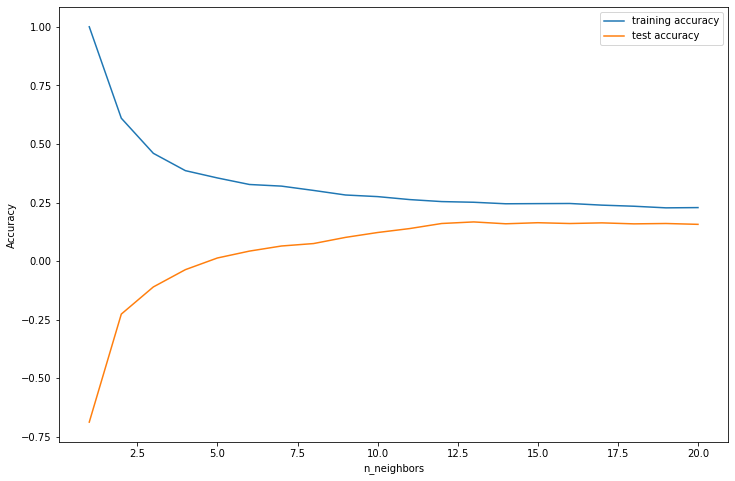

The optimal number of neighbors is: 13


In [38]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

## <i> KNN </i>

In [39]:
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler

# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            chef_target,
            random_state = 222,
            test_size = 0.25,
            stratify =  chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.7498
Testing  ACCURACY: 0.7228
AUC Score        : 0.6283


## <i> CART </i>

In [40]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 70  86]
 [ 72 259]]


In [41]:
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [42]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7207
AUC Score        : 0.6827


In [43]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


Training ACCURACY: 0.7944
Testing  ACCURACY: 0.7536
AUC Score        : 0.7255


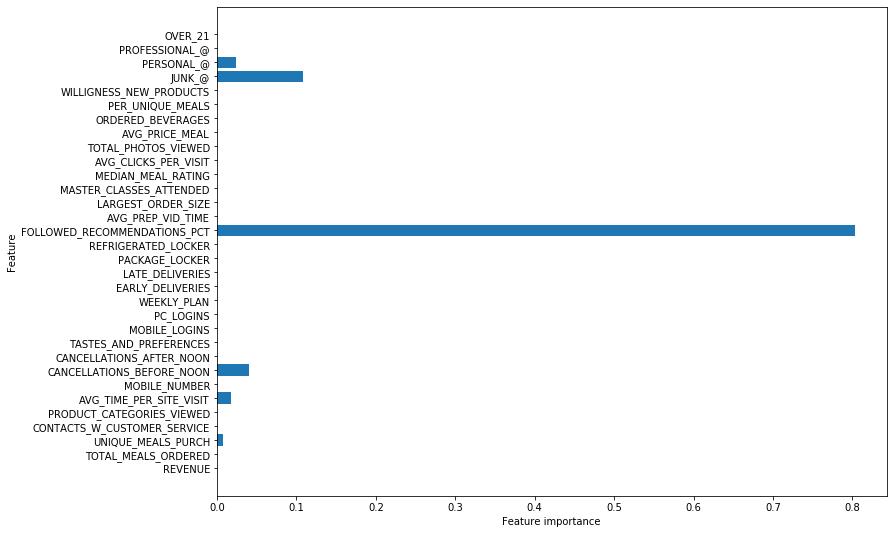

In [44]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)